In [3]:
def numeric_partial_derivative(f, x, i, h=1e-6):
    """Compute the i-th partial derivative of f at x."""
    x[i] += h
    a = f(x)
    x[i] -= 2*h
    b = f(x)
    x[i] += h
    print((a-b) / 2*h)
    return (a - b) / 2*h

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:
def gradient_descent_fixed(f, x, max_iter=10, tol=1e-6, alfa=0.01):
    """Perform gradient descent optimization."""
    for k in range(max_iter):
        v = np.array([numeric_partial_derivative(f, x, i) for i in range(len(x))])
        x = x - alfa * v

        # Plot the function in 3D, the gradient vector, and the point
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        X = np.linspace(-5, 5, 100)
        Y = np.linspace(-5, 5, 100)
        X, Y = np.meshgrid(X, Y)
        Z = f([X, Y])
        ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
        
        # Plot the current point and gradient vector
        ax.quiver(x[0], x[1], f(x), -v[0], -v[1], 0, color='red')
        ax.scatter(x[0], x[1], f(x), color='red')
        plt.show()

        if np.linalg.norm(v) < tol:
            break
    
    return x

0.013953499999999999
-0.00115


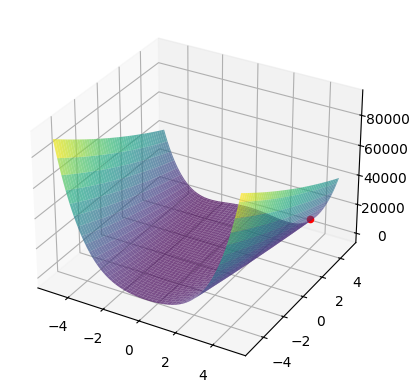

1.9203525595003156e-08
-2.399774447439995e-09


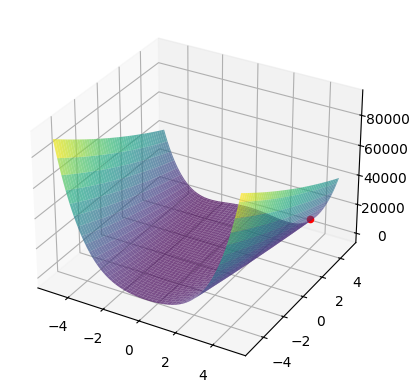

[3.99986046 4.0000115 ]


In [6]:


def f_1(x):
    return (x[0] ** 4) + (x[1] ** 4) - (2 * x[0] ** 2 * x[1] ** 2) + (6 * x[0]*x[1]) - (4 * x[0]) - (4 * x[1]) + 1
def f_r_2(x):
    return 100*((x[1]-x[0] ** 2)**2) + (x[0] -1)**2 

#testando o gradiente
x = np.array([5,5])
print(gradient_descent_fixed(f_r_2, x))

In [7]:
#find global minimum of f_r_2 using scikit learn
from scipy.optimize import minimize
x = np.array([5,5])

res = minimize(f_1, x, method='nelder-mead', options={'xatol': 1e-8, 'disp': True})
res


C:\Users\Fernando\AppData\Local\Temp\ipykernel_12868\3922659060.py:5: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  res = minimize(f_1, x, method='nelder-mead', options={'xatol': 1e-8, 'disp': True})


       message: Maximum number of function evaluations has been exceeded.
       success: False
        status: 1
           fun: -1.9559233681912357e+19
             x: [ 4.306e+08 -4.306e+08]
           nit: 182
          nfev: 400
 final_simplex: (array([[ 4.306e+08, -4.306e+08],
                       [ 4.306e+08, -4.306e+08],
                       [ 4.306e+08, -4.306e+08]]), array([-1.956e+19, -1.034e+19,  8.111e+18]))

In [10]:
#find global min for f_1 with scipy
from scipy.optimize import minimize
res = minimize(f_1, x, method='nelder-mead', options={'xatol': 1e-8, 'disp': True})

C:\Users\Fernando\AppData\Local\Temp\ipykernel_12868\1620027092.py:3: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  res = minimize(f_1, x, method='nelder-mead', options={'xatol': 1e-8, 'disp': True})
